# Install and import packages

In [1]:
!pip install pandas

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install seaborn

     |████████████████████████████████| 283 kB 10.9 MB/s 
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# install packages
!pip install imblearn
!pip install seaborn

     |████████████████████████████████| 167 kB 20.3 MB/s 
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 283 kB 16.3 MB/s 
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# data representation
import pandas as pd
import numpy as np
from zipfile import ZipFile
import re

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle
from imblearn import over_sampling

# data transformation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

# model selection
from sklearn.model_selection import train_test_split, GridSearchCV

# ML models
from sklearn.linear_model import LogisticRegressionCV, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# model metrics
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, precision_recall_fscore_support, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, auc, f1_score


# Data pre-processing and preliminary analysis

## Data importing and processing

### MGX

In [ ]:
def get_omics(link):
    profile = pd.read_csv(link, delimiter='\t', header=0).T
    names = profile.iloc[0, :]
    profile = profile.iloc[1:,:]
    profile = profile.reset_index(drop=False)
    profile.rename(columns = {'index': 'External ID'},  
          inplace = True)
    profile = profile.sort_values(by='External ID', axis=0, ascending=True).reset_index(drop=True)
    print(link)
    print(profile.shape)
    print(names)
    print(profile.iloc[:5, :5])
    return profile.reset_index(drop=True), names

In [ ]:
mgx_otu, mgx_otu_names = get_omics('/datasets/mgx/mgx_taxonomic_profiles.tsv')

/datasets/mgx/mgx_taxonomic_profiles.tsv
(1638, 1480)
0                                              k__Archaea
1                             k__Archaea|p__Euryarchaeota
2          k__Archaea|p__Euryarchaeota|c__Methanobacteria
3       k__Archaea|p__Euryarchaeota|c__Methanobacteria...
4       k__Archaea|p__Euryarchaeota|c__Methanobacteria...
                              ...                        
1474    k__Viruses|p__Viruses_noname|c__Viruses_noname...
1475    k__Viruses|p__Viruses_noname|c__Viruses_noname...
1476    k__Viruses|p__Viruses_noname|c__Viruses_noname...
1477    k__Viruses|p__Viruses_noname|c__Viruses_noname...
1478                                         unclassified
Name: #SampleID, Length: 1479, dtype: object
  External ID  0  1  2  3
0  CSM5FZ3N_P  0  0  0  0
1  CSM5FZ3R_P  0  0  0  0
2  CSM5FZ3T_P  0  0  0  0
3  CSM5FZ3V_P  0  0  0  0
4  CSM5FZ3X_P  0  0  0  0


In [ ]:
# mgx_path, mgx_path_names = get_omics('/datasets/mgx/mgx_pathabundance_relab.tsv')

In [ ]:
# mgx_ecs, mgx_ec_names = get_omics('/datasets/mgx/mgx_ecs_relab.slim.tsv')

In [ ]:
# mgx_kos, mgx_ko_names = get_omics('/datasets/mgx/mgx_kos_relab.slim.tsv')

### MTX

In [ ]:
# mtx_ecs, mtx_ec_names = get_omics('/datasets/mtx/mtx_ecs_relab.tsv')

In [ ]:
# mtx_genefam, mtx_genefam_names = get_omics('/datasets/mtx/mtx_genefamilies.tsv')

In [ ]:
mtx_path, mtx_path_names = get_omics('/datasets/mtx/mtx_pathabundance_relab.tsv')

/datasets/mtx/mtx_pathabundance_relab.tsv
(735, 6062)
0       1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...
1       1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...
2       1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...
3       1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...
4       1CMET2-PWY: N10-formyl-tetrahydrofolate biosyn...
                              ...                        
6056    VALSYN-PWY: L-valine biosynthesis|g__Synergist...
6057    VALSYN-PWY: L-valine biosynthesis|g__Veillonel...
6058    VALSYN-PWY: L-valine biosynthesis|g__Veillonel...
6059    VALSYN-PWY: L-valine biosynthesis|g__Veillonel...
6060       VALSYN-PWY: L-valine biosynthesis|unclassified
Name: # Pathway, Length: 6061, dtype: object
  External ID           0  1  2  3
0    CSM5FZ4M    0.015748  0  0  0
1    CSM5MCUO  0.00751257  0  0  0
2    CSM5MCVN    0.025239  0  0  0
3    CSM5MCW6   0.0170059  0  0  0
4    CSM5MCWC  0.00201205  0  0  0


### MBX

In [ ]:
# mbx_bolite, mbx_bolite_names = get_omics('/datasets/mbx/MBX_metabolomics.tsv')

### MVX

In [ ]:
mvx_otu, mvx_otu_names = get_omics('/datasets/mvx/MVX_taxonomic_profiles.tsv')

/datasets/mvx/MVX_taxonomic_profiles.tsv
(329, 56)
0     k__Viruses|p__Viruses_noname|c__Viruses_noname...
1     k__Viruses|p__Viruses_noname|c__Viruses_noname...
2     k__Viruses|p__Viruses_noname|c__Viruses_noname...
3     k__Viruses|p__Viruses_noname|c__Viruses_noname...
4     k__Viruses|p__Viruses_noname|c__Viruses_noname...
5     k__Viruses|p__Viruses_noname|c__Viruses_noname...
6     k__Viruses|p__Viruses_noname|c__Viruses_noname...
7     k__Viruses|p__Viruses_noname|c__Viruses_noname...
8     k__Viruses|p__Viruses_noname|c__Viruses_noname...
9     k__Viruses|p__Viruses_noname|c__Viruses_noname...
10    k__Viruses|p__Viruses_noname|c__Viruses_noname...
11    k__Viruses|p__Viruses_noname|c__Viruses_noname...
12    k__Viruses|p__Viruses_noname|c__Viruses_noname...
13    k__Viruses|p__Viruses_noname|c__Viruses_noname...
14    k__Viruses|p__Viruses_noname|c__Viruses_noname...
15    k__Viruses|p__Viruses_noname|c__Viruses_noname...
16    k__Viruses|p__Viruses_noname|c__Viruses_noname.

In [ ]:
def load_profile(file):
    # 16S OTU
    # read the dataset
    # otu = pd.read_csv('[16S] otu_ibd_tax.csv', header=1)
    otu = pd.read_csv(file, delimiter='\t')
    # get the otu id
    otu_id = otu['taxonomy']
    # replace taxonomy id with name
    # otu.iloc[:, 0] = otu.iloc[:, -1]
    # drop taxonomy name column
    otu = otu.drop('taxonomy', axis=1)
    # transpose the dataset
    otu = otu.T
    # rename the columns to the name of the genuses
    otu.columns = otu.iloc[0]
    # reset index
    otu = otu[1:].reset_index()
    otu = otu.rename({'index':'sample_name'}, axis=1)
    # sort the samples by sample name
    otu = otu.sort_values(by='sample_name', axis=0, ascending=True).reset_index(drop=True)
    # set index to sample name
    otu = otu.set_index('sample_name')

    # normalize the data to get abundance profile
    otu = otu.div(otu.sum(axis=1), axis=0)

    # check out data
    print(otu.shape, otu.iloc[:10, :10].head())

    return otu_id, otu

In [ ]:
# rna_otu, rna_profile = load_profile('/home/jovyan/work/hmp/16S_taxonomic_profiles.tsv')

### Metadata

In [ ]:
# import metadata
metadata = pd.read_csv('/datasets/meta/hmp2_metadata.csv')
metadata['diseased'] = metadata['diagnosis'].replace({'UC': 1, 'CD': 1, 'nonIBD': 0})

/opt/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (12,13,14,40,46,55,65,66,67,68,177,294,298,299,300,301,304,305,306,307,308,309,310,318,320,328,330,346,348,350,352,354,359,361,363,366,373,377,381,383,418,419,432,433,434,435,436,438,439,440,441,442,444,445,446,447,448,450,451,452,453,454) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
metadata.iloc[:10, :10].head()

,Project,External ID,Participant ID,site_sub_coll,data_type,week_num,date_of_receipt,interval_days,visit_num,Research Project
0,C3001CSC1_BP,206615,C3001,C3001CSC1,biopsy_16S,2.0,NaN,NaN,1,ibdmdb
1,C3001CSC2_BP,206614,C3001,C3001CSC2,biopsy_16S,2.0,NaN,NaN,1,ibdmdb
2,C3002CSC1_BP,206617,C3002,C3002CSC1,biopsy_16S,0.0,NaN,NaN,1,ibdmdb
3,C3002CSC2_BP,206619,C3002,C3002CSC2,biopsy_16S,0.0,NaN,NaN,1,ibdmdb
4,C3002CSC3_BP,206616,C3002,C3002CSC3,biopsy_16S,0.0,NaN,NaN,1,ibdmdb


In [ ]:
# check out metadata columns
metadata.columns

Index(['Project', 'External ID', 'Participant ID', 'site_sub_coll',
       'data_type', 'week_num', 'date_of_receipt', 'interval_days',
       'visit_num', 'Research Project',
       ...
       'Proteomics received at LBNL:', 'Stool Sample ID:  Tube A  (EtOH)',
       'Sample ID: Tube B (No preservative)',
       'Tube A and B received at Broad:', 'stool_id', 'smoking status',
       'Number years smoked', 'Age when started smoking',
       'How many cigarettes/cigars/etc. do you smoke per day?', 'diseased'],
      dtype='object', length=491)

In [ ]:
data_types = metadata['data_type'].unique()

In [ ]:
def get_meta(data):
    meta = metadata[metadata['data_type'] == data]
    # sort metadata by sample names
    meta = meta.sort_values(by='External ID', axis=0, ascending=True).reset_index(drop=True)
    print('# of samples', meta.shape[0])
    print('# of participants', len(meta['Participant ID'].unique()))
    print('# of diseased', meta['diagnosis'].value_counts(normalize=True))
    return meta

In [ ]:
meta = {}
for each in data_types:
    print(each)
    meta[each] = get_meta(each)

biopsy_16S
# of samples 178
# of participants 81
# of diseased CD        0.483146
UC        0.258427
nonIBD    0.258427
Name: diagnosis, dtype: float64
host_genome
# of samples 92
# of participants 92
# of diseased CD        0.50000
UC        0.26087
nonIBD    0.23913
Name: diagnosis, dtype: float64
host_transcriptomics
# of samples 252
# of participants 90
# of diseased CD        0.503968
UC        0.293651
nonIBD    0.202381
Name: diagnosis, dtype: float64
metabolomics
# of samples 546
# of participants 106
# of diseased CD        0.485348
UC        0.267399
nonIBD    0.247253
Name: diagnosis, dtype: float64
metagenomics
# of samples 1638
# of participants 130
# of diseased CD        0.457875
UC        0.280220
nonIBD    0.261905
Name: diagnosis, dtype: float64
metatranscriptomics
# of samples 835
# of participants 109
# of diseased CD        0.471856
UC        0.285030
nonIBD    0.243114
Name: diagnosis, dtype: float64
methylome
# of samples 449
# of participants 94
# of diseased CD

### Combined data

In [ ]:
data_types

array(['biopsy_16S', 'host_genome', 'host_transcriptomics',
       'metabolomics', 'metagenomics', 'metatranscriptomics', 'methylome',
       'proteomics', 'serology', 'stool_16S', 'viromics'], dtype=object)

In [ ]:
mgx_meta = meta['metagenomics']
mtx_meta = meta['metatranscriptomics']
mbx_meta = meta['metabolomics']
mvx_meta = meta['viromics']

In [ ]:
mgx_otu_d = pd.merge(mgx_meta[['External ID', 'Participant ID', 'diseased']], mgx_otu,  on=['External ID'])
mgx_otu_d.iloc[:5, :10]

,External ID,Participant ID,diseased,0,1,2,3,4,5,6
0,CSM5FZ3N_P,C3001,1,0,0,0,0,0,0,0
1,CSM5FZ3R_P,C3001,1,0,0,0,0,0,0,0
2,CSM5FZ3T_P,C3002,1,0,0,0,0,0,0,0
3,CSM5FZ3V_P,C3001,1,0,0,0,0,0,0,0
4,CSM5FZ3X_P,C3002,1,0,0,0,0,0,0,0


In [ ]:
mtx_path_d = pd.merge(mtx_meta[['External ID', 'Participant ID', 'diseased']], mtx_path,  on='External ID')
mtx_path_d.iloc[:5, :10]

,External ID,Participant ID,diseased,0,1,2,3,4,5,6
0,CSM5FZ4M,C3003,1,0.015748,0,0,0,0,0,0
1,CSM5MCUO,C3006,1,0.00751257,0,0,0,0,0,0
2,CSM5MCVN,C3002,1,0.025239,0,0,0,0,0,0
3,CSM5MCW6,C3008,1,0.0170059,0,0,0,0,0,0
4,CSM5MCWC,C3009,1,0.00201205,0,0,0,0,0,0


In [ ]:
mgx_otu_d.groupby('Participant ID')['diseased'].mean().value_counts()

1    103
0     27
Name: diseased, dtype: int64

In [ ]:
len(mtx_path_d['Participant ID'].unique())

104

In [ ]:
mtx_path_d.groupby('Participant ID')['diseased'].mean().value_counts()

1    78
0    26
Name: diseased, dtype: int64

## Meta data analysis

In [ ]:
# visualize the distribution
# categorical data
def cat_plot(df, col, x):
    plt.figure()
    plt.bar(df[col].unique(), df[col].value_counts(normalize=True), tick_label=x)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Classes')
    plt.ylabel('Proportions')
    plt.show()
# numerical data
def num_plot(df, col, r):
    plt.figure()
    plt.hist(df[col], density=True, range=r)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Values')
    plt.ylabel('Proportions')
    plt.show()
def num_plot_2(df, col1, col2):
    plt.figure()
    plt.scatter(df[col1], df[col2])
    plt.title(f'Scatter plot of {col1} and {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()


## -Omics data analysis

In [ ]:
# # see how much each type of bacteria is present on different levels of biological classification
# levels = {'phylum': 0, 'class': 1, 'order': 2, 'family': 3, 'genus': 4}
# def level_count(level):
#     count = {}
#     prevalence = {}
#     for col in otu.columns:
#         k = levels[level]
#         ind = [n for n in range(0, len(col)) if col.find(';', n) == n][k:k+2]
#         lev = col[ind[0]+4:ind[1]]
#         if k == 0:
#             if lev == '':
#                 lev = 'Bacteria' + ';__'
#             if lev not in count.keys():
#                 count[lev] = 1
#             else:
#                 count[lev] += 1
#         else:
#             if len(lev) > 1 and len(re.findall('[a-zA-Z]', lev)) > 1:
#                 if lev not in count.keys():
#                     count[lev] = 1
#                 else:
#                     count[lev] += 1
#             else:
#                 while k > 0 and (lev == '' or lev == ';__' or lev == ';__;__'or lev == ';__;__;__'or lev == ';__;__;__;__' or lev == ';__;__;__;__;__'):
#                     if len(re.findall('[a-zA-Z]', lev)) == 1:
#                         lev = ';__'
#                     k = k - 1
#                     ind = [n for n in range(0, len(col)) if col.find(';', n) == n][k:k+2]
#                     lev_ = col[ind[0]+4:ind[1]]
#                     if len(re.findall('[a-zA-Z]', lev_)) == 1:
#                         lev_ = ';__'
#                     lev =  lev_ + lev
#                 if len(re.findall('[a-zA-Z]', lev)) == 1:
#                     lev = 'Bacteria' + lev
#                 if lev not in count.keys():
#                     count[lev] = 1
#                 else:
#                     count[lev] += 1
#     print(f'# of counts in each {level} (top 10)')
#     return (sorted(count.items(), key=lambda x:x[1], reverse=True)[:10])

## Clustering of healthy and diseased samples

Explained variance ratio:  [0.25598753 0.16502405]


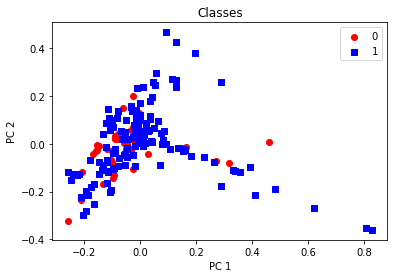

In [ ]:
# plot clustering of healthy and diseased
def plot_2d_space(X, y, label='Classes'):   
    colors = ['red', 'blue', 'black']
    markers = ['o', 's', 'x']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

# pca transform the otu abundance
pca = PCA(n_components=2)
otu_pca = pca.fit_transform(otu_w_id)
print('Explained variance ratio: ', pca.explained_variance_ratio_)
plot_2d_space(otu_pca, combined['diseased'])

# Classification pipeline

## Split the dataset

In [ ]:
# split the dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(combined.drop('diseased', axis=1), combined['diseased'], test_size = 0.3, random_state = 123)

## Resample data

In [ ]:
# oversample minority class to get more balanced dataset
smote = over_sampling.SMOTE(sampling_strategy='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train.to_numpy(), y_train.to_numpy().reshape(-1,1))


In [ ]:
# size of resampled training set
print(X_train_sm.shape)
print(y_train_sm.value_counts())

(186, 982)


AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

[0.27213119 0.18348081]


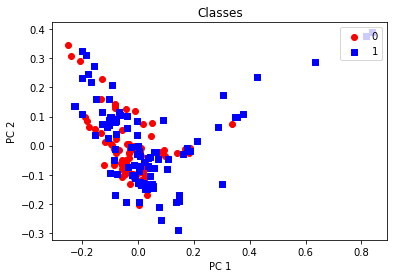

In [ ]:
# clustering for balanced dataset
pca_sm = PCA(n_components=2)
otu_sm_pca = pca_sm.fit_transform(X_train_sm)
print(pca_sm.explained_variance_ratio_)
plot_2d_space(otu_sm_pca, y_train_sm)

## Data transformation

In [ ]:
# principle components analysis
def pca(X_train, X_test, n):
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca

# linear discriminant analysis
def lda(X_train, X_test, y_train):
    lda = LinearDiscriminantAnalysis()
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)
    return X_train_lda, X_test_lda

In [ ]:
# pca transform original data
X_train_pca, X_test_pca = pca(X_train, X_test, 5)
# lda transform original data
X_train_lda, X_test_lda = lda(X_train, X_test, y_train)
# pca transform resampled data
X_train_sm_pca, X_test_sm_pca = pca(X_train_sm, X_test, 5)
# lda transform resampled data
X_train_sm_lda, X_test_sm_lda = lda(X_train_sm, X_test, y_train_sm)

## Classification

### Models

In [ ]:
# logistic regression
def logistic_regression(X_train, X_test, y_train, y_test):
    model = LogisticRegressionCV(penalty='l1', solver='liblinear')
    model.fit(X_train, y_train)
    y_train_score_1 = model.predict_proba(X_train).T[1]
    y_train_score_0 = model.predict_proba(X_train).T[0]
    y_train_pred = model.predict(X_train)
    y_test_score_1 = model.predict_proba(X_test).T[1]
    y_test_score_0 = model.predict_proba(X_test).T[0]
    y_test_pred = model.predict(X_test)
    precision1, recall1, thresholds1 = precision_recall_curve(y_test, y_test_score_1)
    precision0, recall0, thresholds0 = precision_recall_curve(y_test, y_test_score_0)
    pr_auc1 = "{:.2f}".format(auc(recall1, precision1))
    pr_auc0 = "{:.2f}".format(auc(recall0, precision0))
    print('confusion matrix for test', confusion_matrix(y_test, y_test_pred))
    print('precision recall auc for test', pr_auc0, pr_auc1)
    print('f1-score for train', f1_score(y_train, y_train_pred, average = None))
    print('f1-score for test', f1_score(y_test, y_test_pred, average = None))
    return recall0, precision0, pr_auc0, recall1, precision1, pr_auc1, 'lr'

In [ ]:
# random forest
def rfc(X_train, X_test, y_train, y_test):
    # cross validation for random forest classifier
    # param_grid = { 
    #     'n_estimators': [200, 500],
    #     'max_features': ['auto', 'sqrt', 'log2'],
    #     'max_depth' : [4,5,6,7,8],
    #     'criterion' :['gini', 'entropy']
    # }

    # rfc_ = RandomForestClassifier(random_state=123)
    # grc = GridSearchCV(rfc_, param_grid=param_grid, cv=7)
    # grc.fit(X_train_lda, y_train)
    # grc.best_params_
    # build and run random forest classifier
    model = RandomForestClassifier(random_state=123, max_features='auto', n_estimators= 200, max_depth=4, criterion='gini')
    model.fit(X_train, y_train)
    y_train_score_1 = model.predict_proba(X_train).T[1]
    y_train_score_0 = model.predict_proba(X_train).T[0]
    y_train_pred = model.predict(X_train)
    y_test_score_1 = model.predict_proba(X_test).T[1]
    y_test_score_0 = model.predict_proba(X_test).T[0]
    y_test_pred = model.predict(X_test)
    precision1, recall1, thresholds1 = precision_recall_curve(y_test, y_test_score_1)
    precision0, recall0, thresholds0 = precision_recall_curve(y_test, y_test_score_0)
    pr_auc1 = "{:.2f}".format(auc(recall1, precision1))
    pr_auc0 = "{:.2f}".format(auc(recall0, precision0))
    print('confusion matrix for test', confusion_matrix(y_test, y_test_pred))
    print('precision recall auc for test', pr_auc0, pr_auc1)
    print('f1-score for train', f1_score(y_train, y_train_pred, average = None))
    print('f1-score for test', f1_score(y_test, y_test_pred, average = None))
    return recall0, precision0, pr_auc0, recall1, precision1, pr_auc1, 'rfc'

In [ ]:
# naive bayes
def nb_gaussian(X_train, X_test, y_train, y_test):
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_train_score_1 = model.predict_proba(X_train).T[1]
    y_train_score_0 = model.predict_proba(X_train).T[0]
    y_train_pred = model.predict(X_train)
    y_test_score_1 = model.predict_proba(X_test).T[1]
    y_test_score_0 = model.predict_proba(X_test).T[0]
    y_test_pred = model.predict(X_test)
    precision1, recall1, thresholds1 = precision_recall_curve(y_test, y_test_score_1)
    precision0, recall0, thresholds0 = precision_recall_curve(y_test, y_test_score_0)
    pr_auc1 = "{:.2f}".format(auc(recall1, precision1))
    pr_auc0 = "{:.2f}".format(auc(recall0, precision0))
    print('confusion matrix for test', confusion_matrix(y_test, y_test_pred))
    print('precision recall auc for test', pr_auc0, pr_auc1)
    print('f1-score for train', f1_score(y_train, y_train_pred, average = None))
    print('f1-score for test', f1_score(y_test, y_test_pred, average = None))
    return recall0, precision0, pr_auc0, recall1, precision1, pr_auc1, 'nb'

In [ ]:
def elasticnetcv(X_train, X_test, y_train, y_test):
    model = ElasticNetCV()
    model.fit(X_train, y_train)
    y_train_pred = [int(k > 0.5) for k in model.predict(X_train)]
    y_test_pred = [int(k > 0.5) for k in model.predict(X_test)]
    # print('accuracy for train', accuracy_score(y_train, y_train_pred))
    # print('accuracy for test', accuracy_score(y_test, y_test_pred))
    # print('roc auc for train', roc_auc_score(y_train, model.predict_proba(X_train).T[1]))
    # print('roc auc for test', roc_auc_score(y_test, model.predict_proba(X_test).T[1]))
    # print('precision, recall, f-score, support for train', precision_recall_fscore_support(y_train, y_train_pred))
    # print('precision, recall, f-score, support for test', precision_recall_fscore_support(y_test, y_test_pred))

In [ ]:
def knn(X_train, X_test, y_train, y_test):
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    y_train_score_1 = model.predict_proba(X_train).T[1]
    y_train_score_0 = model.predict_proba(X_train).T[0]
    y_train_pred = model.predict(X_train)
    y_test_score_1 = model.predict_proba(X_test).T[1]
    y_test_score_0 = model.predict_proba(X_test).T[0]
    y_test_pred = model.predict(X_test)
    precision1, recall1, thresholds1 = precision_recall_curve(y_test, y_test_score_1)
    precision0, recall0, thresholds0 = precision_recall_curve(y_test, y_test_score_0)
    pr_auc1 = "{:.2f}".format(auc(recall1, precision1))
    pr_auc0 = "{:.2f}".format(auc(recall0, precision0))
    print('confusion matrix for test', confusion_matrix(y_test, y_test_pred))
    print('precision recall auc for test', pr_auc0, pr_auc1)
    print('f1-score for train', f1_score(y_train, y_train_pred, average = None))
    print('f1-score for test', f1_score(y_test, y_test_pred, average = None))
    return recall0, precision0, pr_auc0, recall1, precision1, pr_auc1, 'knn'

In [ ]:
def svc(X_train, X_test, y_train, y_test):
    model = SVC(probability=True)
    model.fit(X_train, y_train)
    y_train_score_1 = model.predict_proba(X_train).T[1]
    y_train_score_0 = model.predict_proba(X_train).T[0]
    y_train_pred = model.predict(X_train)
    y_test_score_1 = model.predict_proba(X_test).T[1]
    y_test_score_0 = model.predict_proba(X_test).T[0]
    y_test_pred = model.predict(X_test)
    precision1, recall1, thresholds1 = precision_recall_curve(y_test, y_test_score_1)
    precision0, recall0, thresholds0 = precision_recall_curve(y_test, y_test_score_0)
    pr_auc1 = "{:.2f}".format(auc(recall1, precision1))
    pr_auc0 = "{:.2f}".format(auc(recall0, precision0))
    print('confusion matrix for test', confusion_matrix(y_test, y_test_pred))
    print('precision recall auc for test', pr_auc0, pr_auc1)
    print('f1-score for train', f1_score(y_train, y_train_pred, average = None))
    print('f1-score for test', f1_score(y_test, y_test_pred, average = None))
    return recall0, precision0, pr_auc0, recall1, precision1, pr_auc1, 'svc'

In [ ]:
def compare_auc(X_train, X_test, y_train, y_test, title):
    models = []
    models.append(logistic_regression(X_train, X_test, y_train, y_test))
    models.append(svc(X_train, X_test, y_train, y_test))
    models.append(nb_gaussian(X_train, X_test, y_train, y_test))
    models.append(knn(X_train, X_test, y_train, y_test))
    models.append(rfc(X_train, X_test, y_train, y_test))

    plt.figure()
    for mod in models:
        plt.plot(mod[0], mod[1], label=f'{mod[6]}, auc = {mod[2]}')
    plt.title(f'AUC for each model with {title} on class 0')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

    plt.figure()
    for mod in models:
        plt.plot(mod[3], mod[4], label=f'{mod[6]}, auc = {mod[5]}')
    plt.title(f'AUC for each model with {title} on class 1')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()



### Implementation

confusion matrix for test [[ 9  6]
 [ 9 30]]
precision recall auc for test 0.60 0.89
f1-score for train [1. 1.]
f1-score for test [0.54545455 0.8       ]
confusion matrix for test [[ 2 13]
 [ 0 39]]
precision recall auc for test 0.60 0.80
f1-score for train [0.22857143 0.87323944]
f1-score for test [0.23529412 0.85714286]
confusion matrix for test [[12  3]
 [ 9 30]]
precision recall auc for test 0.60 0.93
f1-score for train [0.84931507 0.93714286]
f1-score for test [0.66666667 0.83333333]
confusion matrix for test [[ 5 10]
 [ 6 33]]
precision recall auc for test 0.63 0.81
f1-score for train [0.58064516 0.86021505]
f1-score for test [0.38461538 0.80487805]
confusion matrix for test [[ 3 12]
 [ 1 38]]
precision recall auc for test 0.57 0.87
f1-score for train [0.80769231 0.94897959]
f1-score for test [0.31578947 0.85393258]


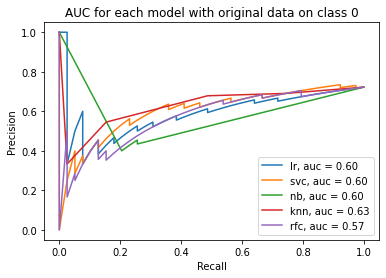

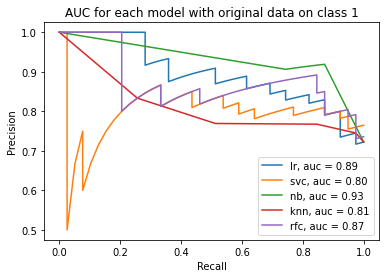

In [ ]:
compare_auc(X_train, X_test, y_train, y_test, 'original data')

confusion matrix for test [[10  5]
 [11 28]]
precision recall auc for test 0.61 0.88
f1-score for train [1. 1.]
f1-score for test [0.55555556 0.77777778]
confusion matrix for test [[ 8  7]
 [ 5 34]]
precision recall auc for test 0.58 0.85
f1-score for train [0.88082902 0.87150838]
f1-score for test [0.57142857 0.85      ]
confusion matrix for test [[12  3]
 [ 6 33]]
precision recall auc for test 0.58 0.94
f1-score for train [0.95384615 0.94915254]
f1-score for test [0.72727273 0.88      ]
confusion matrix for test [[12  3]
 [21 18]]
precision recall auc for test 0.59 0.84
f1-score for train [0.83636364 0.76315789]
f1-score for test [0.5 0.6]
confusion matrix for test [[ 6  9]
 [ 4 35]]
precision recall auc for test 0.57 0.86
f1-score for train [0.97802198 0.97894737]
f1-score for test [0.48       0.84337349]


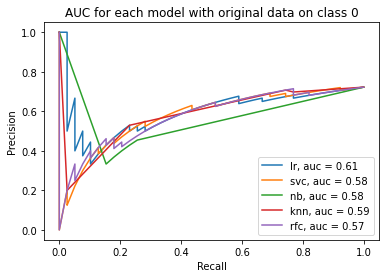

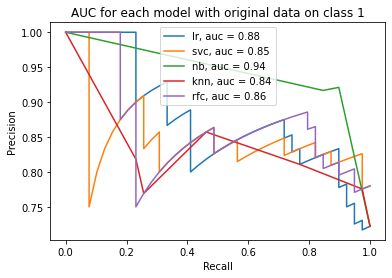

In [ ]:
compare_auc(X_train_sm, X_test, y_train_sm, y_test, 'original data')

confusion matrix for test [[10  5]
 [23 16]]
precision recall auc for test 0.70 0.75
f1-score for train [0.71171171 0.57333333]
f1-score for test [0.41666667 0.53333333]
confusion matrix for test [[ 7  8]
 [17 22]]
precision recall auc for test 0.68 0.71
f1-score for train [0.72815534 0.6626506 ]
f1-score for test [0.35897436 0.63768116]
confusion matrix for test [[ 7  8]
 [24 15]]
precision recall auc for test 0.78 0.75
f1-score for train [0.72072072 0.58666667]
f1-score for test [0.30434783 0.48387097]
confusion matrix for test [[10  5]
 [22 17]]
precision recall auc for test 0.66 0.80
f1-score for train [0.8372093  0.77707006]
f1-score for test [0.42553191 0.55737705]
confusion matrix for test [[ 7  8]
 [ 7 32]]
precision recall auc for test 0.64 0.79
f1-score for train [0.9375     0.93333333]
f1-score for test [0.48275862 0.81012658]


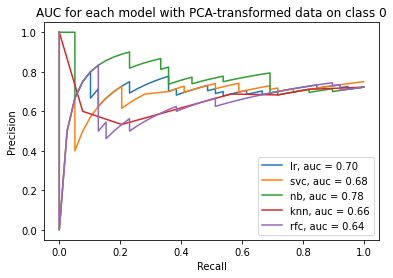

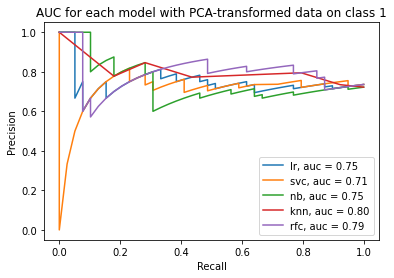

In [ ]:
compare_auc(X_train_sm_pca, X_test_sm_pca, y_train_sm, y_test, 'PCA-transformed data')

confusion matrix for test [[ 15   4]
 [ 20 166]]
precision recall auc for test 0.80 0.99
f1-score for train [0.94628571 0.94566474]
f1-score for test [0.55555556 0.93258427]
confusion matrix for test [[ 15   4]
 [ 22 164]]
precision recall auc for test 0.78 0.99
f1-score for train [0.95583239 0.95449242]
f1-score for test [0.53571429 0.92655367]
confusion matrix for test [[ 12   7]
 [ 13 173]]
precision recall auc for test 0.79 0.99
f1-score for train [0.93597206 0.93757094]
f1-score for test [0.54545455 0.94535519]
confusion matrix for test [[ 15   4]
 [ 22 164]]
precision recall auc for test 0.76 0.99
f1-score for train [0.95790671 0.95702671]
f1-score for test [0.53571429 0.92655367]
confusion matrix for test [[ 15   4]
 [ 25 161]]
precision recall auc for test 0.76 0.99
f1-score for train [0.96489241 0.9638273 ]
f1-score for test [0.50847458 0.91737892]


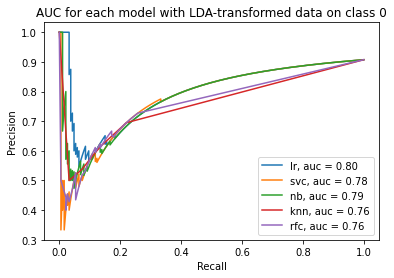

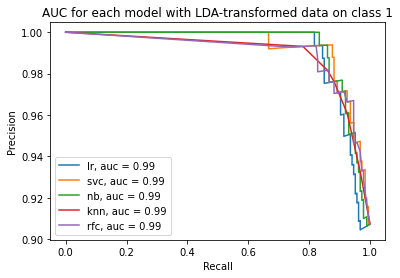

In [ ]:
compare_auc(X_train_sm_lda, X_test_sm_lda, y_train_sm, y_test, 'LDA-transformed data')